# Roller Coaster

#### Overview

This project is slightly different than others you have encountered thus far. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem that you cannot easily solve.

#### Project Goals

You will work to create several data visualizations that will give you insight into the world of roller coasters.

## Prerequisites

In order to complete this project, you should have completed the first two lessons in the [Data Analysis with Pandas Course](https://www.codecademy.com/learn/data-processing-pandas) and the first two lessons in the [Data Visualization in Python course](https://www.codecademy.com/learn/data-visualization-python). This content is also covered in the [Data Scientist Career Path](https://www.codecademy.com/learn/paths/data-science/).

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

   Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [90]:
# 1 
# Import necessary libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# load rankings data
steel_df = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
# load rankings data
wood_df = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')

2. Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

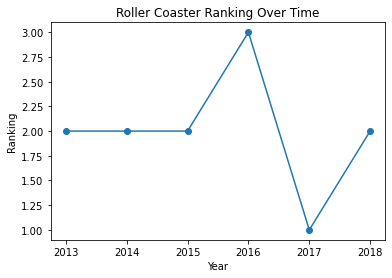

In [91]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def rank_plot(roller_coaster, dataframe, location):
    df = dataframe[(dataframe['Name'] == roller_coaster) & (dataframe['Location'] == location)]
    df = df[['Rank', 'Year of Rank', 'Location']]
    
    years = [x for x in df['Year of Rank']]
    ranks = [x for x in df['Rank']]

    ax = plt.subplot()
    ax.plot(years, ranks, marker='o')
    plt.title("Roller Coaster Ranking Over Time")
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.show()

# Create a plot of El Toro ranking over time
rank_plot('El Toro', wood_df, 'Jackson, N.J.')

3. Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as one roller coaster name, `"Boulder Dash"` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

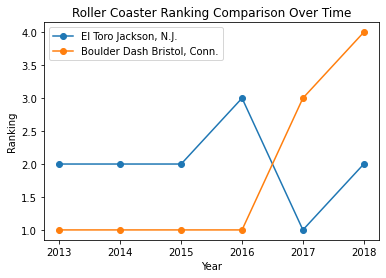

In [92]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
def rank_plot_2(rc1, rc1_loc, rc2, rc2_loc, dataframe):
    df1 = dataframe[(dataframe['Name'] == rc1) & (dataframe['Location'] == rc1_loc)]
    df1 = df1[['Rank', 'Year of Rank', 'Location']]
    df2 = dataframe[(dataframe['Name'] == rc2) & (dataframe['Location'] == rc2_loc)]
    df2 = df2[['Rank', 'Year of Rank', 'Location']]
    
    years1 = [x for x in df1['Year of Rank']]
    ranks1 = [x for x in df1['Rank']]
    years2 = [x for x in df2['Year of Rank']]
    ranks2 = [x for x in df2['Rank']]
  
    ax = plt.subplot()
    ax.plot(years1, ranks1, marker='o', label=rc1+" "+rc1_loc)
    ax.plot(years2, ranks2, marker='o', label=rc2+" "+rc2_loc)
    plt.title("Roller Coaster Ranking Comparison Over Time")
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    return plt.show()

# Create a plot of El Toro and Boulder Dash roller coasters
rank_plot_2('El Toro', 'Jackson, N.J.', 'Boulder Dash', 'Bristol, Conn.', wood_df)

4. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

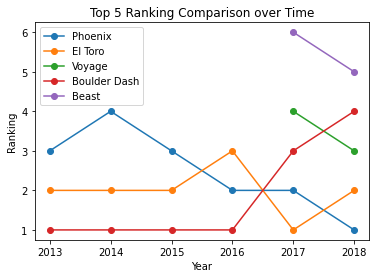

In [93]:
# 4
# Create a function to plot top n rankings over time
def rank_plot_top_rc(n, dataframe):
    rcs_to_plot_filter = dataframe[(dataframe['Year of Rank'] == dataframe['Year of Rank'].max()) & (dataframe['Rank'] <= n)]
    rc_rank_df = dataframe[(dataframe['Name'].isin([x for x in rcs_to_plot_filter['Name']])) & (dataframe['Location'].isin([x for x in rcs_to_plot_filter['Location']]))]
    
    for rc in [x for x in rcs_to_plot_filter['Name']]:
        years = [x for x in rc_rank_df['Year of Rank'][rc_rank_df['Name'] == rc]]
        ranks = [x for x in rc_rank_df['Rank'][rc_rank_df['Name'] == rc]]
        plt.title('Top '+str(n)+' Ranking Comparison over Time')
        plt.xlabel('Year')
        plt.ylabel('Ranking')
        plt.plot(years, ranks, marker='o', label=rc)
    plt.legend()
    plt.show()
    
# Create a plot of top n rankings over time
rank_plot_top_rc(5, wood_df)

5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [94]:
# 5
# load roller coaster data
rc_data = pd.read_csv('roller_coasters.csv')
print(rc_data.dtypes)
print(rc_data.head())

name               object
material_type      object
seating_type       object
speed             float64
height            float64
length            float64
num_inversions    float64
manufacturer       object
park               object
status             object
dtype: object
            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  Wi

6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

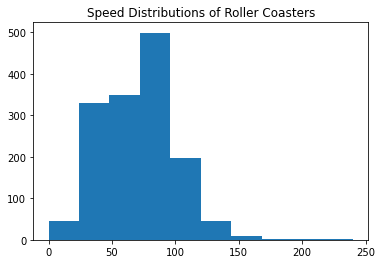

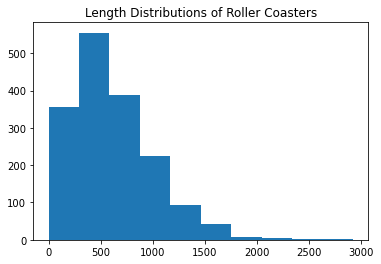

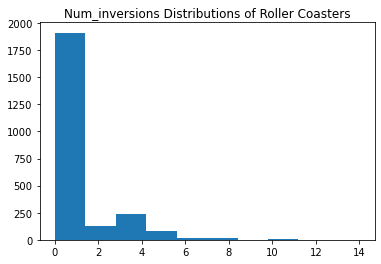

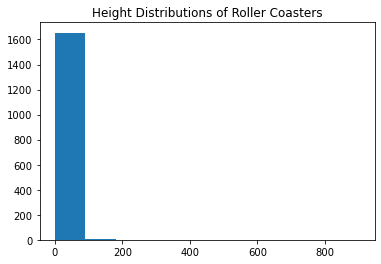

In [95]:
# 6
# Create a function to plot histogram of column values
def plot_hist(column_name, dataframe):
    plt.hist(rc_data[column_name])
    plt.title(str(column_name).capitalize() + " Distributions of Roller Coasters")
    plt.show()
# Create histogram of roller coaster speed
plot_hist('speed', rc_data)
# Create histogram of roller coaster length
plot_hist('length', rc_data)
# Create histogram of roller coaster number of inversions
plot_hist('num_inversions', rc_data)
# Create a function to plot histogram of height values

# Create a histogram of roller coaster height
plot_hist('height', rc_data)

7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

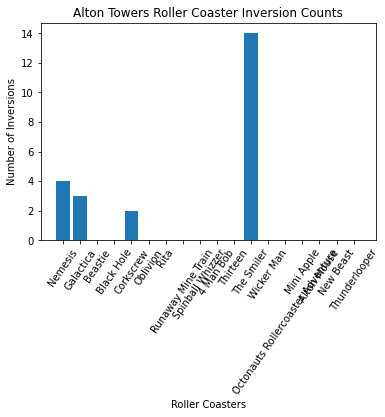

In [96]:
# 7
# Create a function to plot inversions by coaster at park
def num_inversions(dataframe, park):
    df = dataframe[dataframe['park'] == park]
    rc = [x for x in df['name']]
    inversions = [x for x in df['num_inversions']]
    ax = plt.subplot()
    ax.set_xticks(range(len(rc)))
    ax.set_xticklabels(rc, rotation=55)
    ax.bar(range(len(rc)), inversions)
    plt.xlabel("Roller Coasters")
    plt.ylabel("Number of Inversions")
    plt.title(str(park)+" Roller Coaster Inversion Counts")
    plt.show()
# Create barplot of inversions by roller coasters
num_inversions(rc_data, 'Alton Towers')

8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

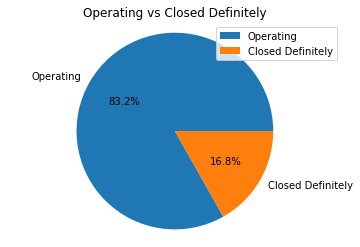

In [97]:
# 8
# Create a function to plot a pie chart of status.operating
def op_status_pie(dataframe):
    #group_data = dataframe.groupby('status').count()
    filter_data = dataframe['status'][(dataframe['status'] == 'status.operating') | (dataframe['status'] == 'status.closed.definitely')]
    group_data = filter_data.value_counts()
    
    plt.pie(group_data, labels=['Operating', 'Closed Definitely'], autopct='%0.1f%%')
    plt.axis('equal')
    plt.title('Operating vs Closed Definitely')
    plt.legend()
    plt.show()
    
# Create pie chart of roller coasters
op_status_pie(rc_data)

9. `.scatter()` is another useful function in matplotlib that you might not have seen before. `.scatter()` produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between two variables. Find [`.scatter()`'s documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

   Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

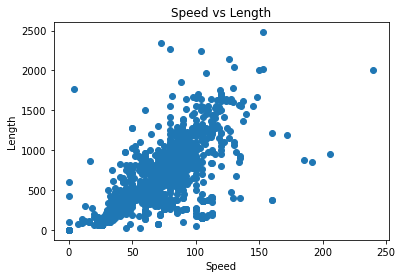

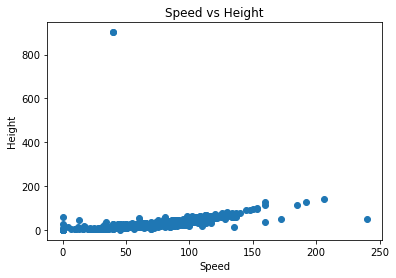

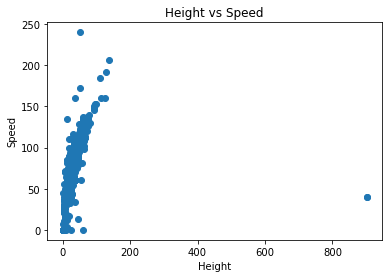

In [98]:
# 9
# Create a function to plot scatter of any two columns
def plot_scatter(dataframe, column1, column2):
    plt.scatter(dataframe[column1], dataframe[column2])
    plt.xlabel(column1.capitalize())
    plt.ylabel(column2.capitalize())
    plt.title(str(column1).capitalize() + ' vs ' + str(column2).capitalize())
    plt.show()
    
plot_scatter(rc_data, 'speed', 'length')
# Create a function to plot scatter of speed vs height
plot_scatter(rc_data, 'speed', 'height')
# Create a scatter plot of roller coaster height by speed
plot_scatter(rc_data, 'height', 'speed')

10. Part of the fun of data analysis and visualization is digging into the data you have and answering questions that come to your mind.

    Some questions you might want to answer with the datasets provided include:
    - What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
    - Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?
    - Do amusement parks have any specialties?
    
    What visualizations can you create that answer these questions, and any others that come to you? Share the questions you ask and the accompanying visualizations you create on the Codecademy forums.

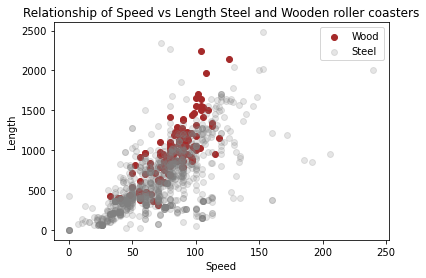

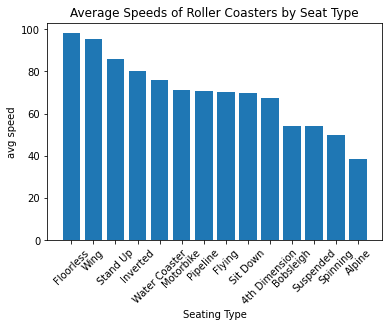

In [119]:
#How does the speed vs height relationship differ between material type?
def steel_v_wood_scatter(dataframe, column1, column2):
    df_wood = dataframe[dataframe['material_type'] == 'Wooden']
    df_steel = dataframe[dataframe['material_type'] == 'Steel']
    plt.scatter(df_wood[column1], df_wood[column2], c='brown', label='Wood')
    plt.scatter(df_steel[column1], df_steel[column2], c='grey', alpha=0.2, label='Steel')
    plt.xlabel(column1.capitalize())
    plt.ylabel(column2.capitalize())
    plt.legend()
    plt.title("Relationship of " + str(column1).capitalize() + ' vs ' + str(column2).capitalize() + " Steel and Wooden roller coasters")
    plt.show()

steel_v_wood_scatter(rc_data, 'speed', 'length')

#Compare the average speeds of roller coasters by seating type.
def comp_avg_speed_seating_type(dataframe):
    df = dataframe[['seating_type', 'speed']].groupby('seating_type').mean().dropna().reset_index()
    df = df.sort_values('speed', ascending=False)
    seat_type = [x for x in df['seating_type']]
    speed = [x for x in df['speed']]
    
    ax = plt.subplot()
    ax.set_xticks(range(len(seat_type)))
    ax.set_xticklabels(seat_type, rotation=45)
    ax.bar(seat_type, speed)
    plt.xlabel('Seating Type')
    plt.ylabel('avg speed')
    plt.title('Average Speeds of Roller Coasters by Seat Type')
    plt.show()
    
comp_avg_speed_seating_type(rc_data)

## Solution

Great work! Visit [our forums](https://discuss.codecademy.com/t/roller-coaster-challenge-project-python-pandas/462378) or the file **Roller Coaster_Solution.ipynb** to compare your project to our sample solution code. You can also learn how to host your own solution on GitHub so you can share it with other learners! Your solution might look different from ours, and that's okay! There are multiple ways to solve these projects, and you'll learn more by seeing others' code.